In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
choice = 0  #start from 0
devices = ['sg13_lv_nmos', 'sg13_lv_pmos', 'sg13_hv_nmos', 'sg13_hv_pmos']

# widths used for characterization
w = np.array([5.0, 5.0, 5.0, 5.0])

In [95]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
fet_name = par_names[1].split('[')[0]

# remove unwanted columns and rename for readability
df = df_raw.drop(['g', 'g.1', 'b', 'd', 'n'], axis=1)
df = df.apply(pd.to_numeric)
df.columns = df.columns.str.replace(fet_name, '')
df.columns = df.columns.str.replace(fet_name[1:], '')
df.columns = df.columns.str.replace('[dc]', '')
df.columns = df.columns.str.replace('onoise..', 'n')
df.columns = df.columns.str.removeprefix('@')
df.columns = df.columns.str.removeprefix('[')
df.columns = df.columns.str.removesuffix(']')
df

,cdd,cgb,cgd,cgdol,cgg,cgs,cgsol,cjd,cjs,css,...,gm,gmb,ids,l,sfl,sid,vth,vb,vd,vg
0,6.818000e-21,4.501000e-16,1.732000e-19,3.025000e-15,4.504000e-16,1.732000e-19,3.025000e-15,1.998000e-15,1.998000e-15,6.818000e-21,...,-3.780000e-14,4.434000e-34,0.000000e+00,1.300000e-07,0.000000e+00,2.834000e-29,0.4360,0.0,0.000,0.0
1,2.899000e-21,4.004000e-16,9.922000e-20,3.025000e-15,4.006000e-16,9.922000e-20,3.025000e-15,1.841000e-15,1.841000e-15,2.899000e-21,...,-3.779000e-14,1.297000e-34,0.000000e+00,1.300000e-07,0.000000e+00,1.198000e-29,0.4561,-0.2,0.000,0.0
2,1.367000e-21,3.647000e-16,6.294000e-20,3.025000e-15,3.648000e-16,6.294000e-20,3.025000e-15,1.727000e-15,1.727000e-15,1.367000e-21,...,-3.779000e-14,-7.461000e-35,0.000000e+00,1.300000e-07,0.000000e+00,5.621000e-30,0.4746,-0.4,0.000,0.0
3,2.974000e-21,4.501000e-16,-2.534000e-19,3.018000e-15,4.504000e-16,5.849000e-19,3.025000e-15,1.975000e-15,1.998000e-15,6.916000e-21,...,7.887000e-10,1.364000e-10,2.946000e-11,1.300000e-07,1.046000e-28,2.090000e-29,0.4360,0.0,0.025,0.0
4,1.264000e-21,4.004000e-16,-2.943000e-19,3.018000e-15,4.006000e-16,4.846000e-19,3.025000e-15,1.825000e-15,1.841000e-15,2.941000e-21,...,3.416000e-10,4.998000e-11,1.247000e-11,1.300000e-07,1.935000e-29,8.846000e-30,0.4561,-0.2,0.025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129649,5.178000e-16,4.880000e-15,6.241000e-16,3.032000e-15,1.325000e-13,1.270000e-13,3.220000e-15,1.413000e-15,1.841000e-15,8.083000e-14,...,4.779000e-04,5.829000e-05,2.606000e-04,3.000000e-06,7.134000e-18,7.064000e-24,0.2271,-0.2,1.175,1.2
129650,4.874000e-16,4.756000e-15,5.898000e-16,3.032000e-15,1.321000e-13,1.268000e-13,3.220000e-15,1.372000e-15,1.727000e-15,8.030000e-14,...,4.705000e-04,5.337000e-05,2.494000e-04,3.000000e-06,6.800000e-18,6.876000e-24,0.2476,-0.4,1.175,1.2
129651,5.135000e-16,5.003000e-15,6.150000e-16,3.025000e-15,1.329000e-13,1.273000e-13,3.220000e-15,1.453000e-15,1.998000e-15,8.148000e-14,...,4.861000e-04,6.427000e-05,2.731000e-04,3.000000e-06,7.509000e-18,7.280000e-24,0.2048,0.0,1.200,1.2
129652,4.836000e-16,4.884000e-15,5.819000e-16,3.025000e-15,1.325000e-13,1.270000e-13,3.220000e-15,1.408000e-15,1.841000e-15,8.083000e-14,...,4.786000e-04,5.835000e-05,2.609000e-04,3.000000e-06,7.146000e-18,7.072000e-24,0.2271,-0.2,1.200,1.2


In [96]:
# sweep variable vectors
l =   np.unique(df['l'])
vgs = np.unique(df['vg'])
vds = np.unique(df['vd'])
vsb = np.unique(-df['vb'])

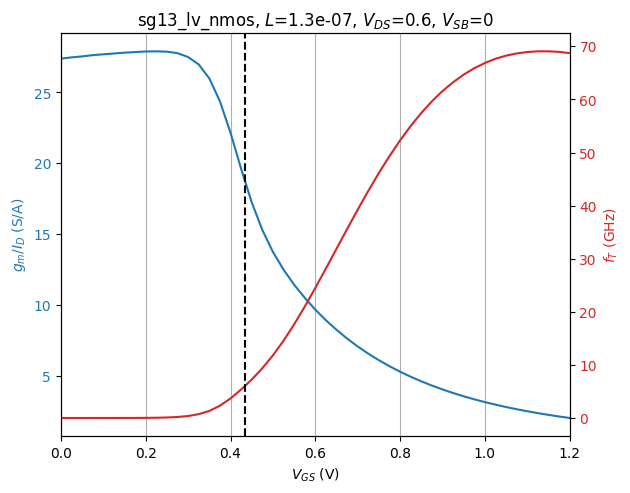

In [97]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=np.max(vds)/2; VSB1=0
df1 = df.loc[(df['l'] == L1) & (df['vd'] == VDS1)& (df['vb'] == -VSB1)]
gm_id1 = df1['gm'].values/df1['ids'].values
cgg1 = df1['cgg'].values + df1['cgsol'].values + df1['cgdol'].values
ft1 = df1['gm'].values/cgg1/2/np.pi
fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, max(vgs))
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

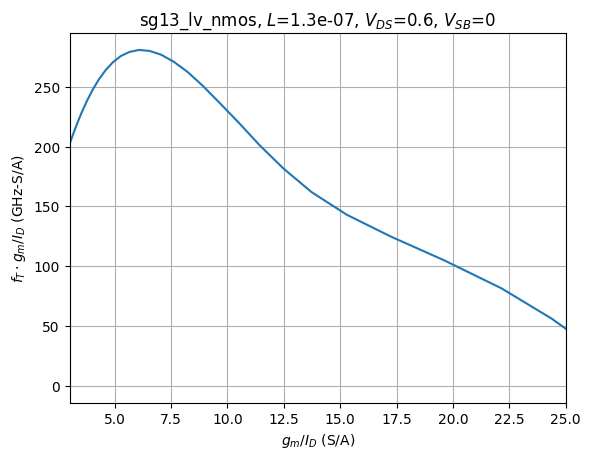

In [98]:
# plot product of gm/ID and fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

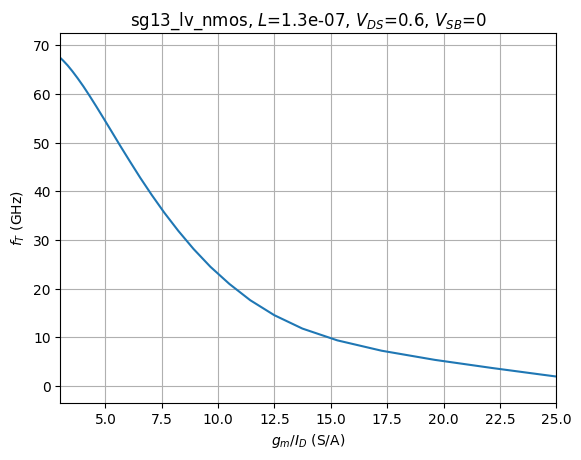

In [99]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

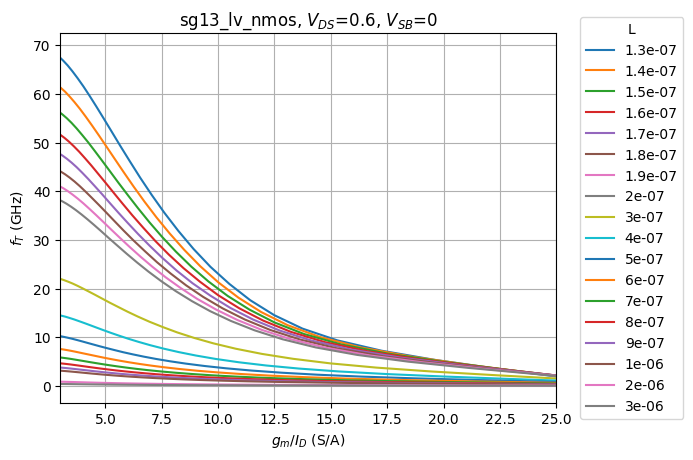

In [100]:
# plot fT versus gm/ID for all L
VDS2=0.6; VSB2=0
df2 = df.loc[ (df['vd'] == VDS2) & (df['vb'] == -VSB2)]
df2
gm_id2 = df2['gm'].values/df2['ids'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
ft2 = df2['gm'].values/(df2['cgg'].values + df2['cgsol'].values + df2['cgdol'].values)/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

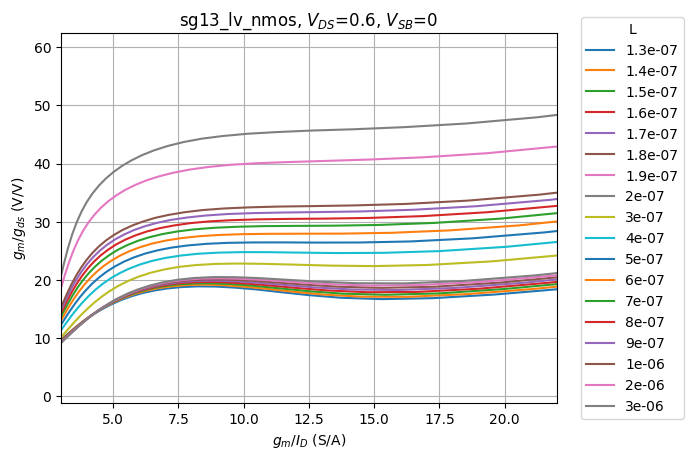

59.53942777390091


In [101]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 22)
#plt.ylim(3, 1000)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()
print(np.amax(gm_gds2))

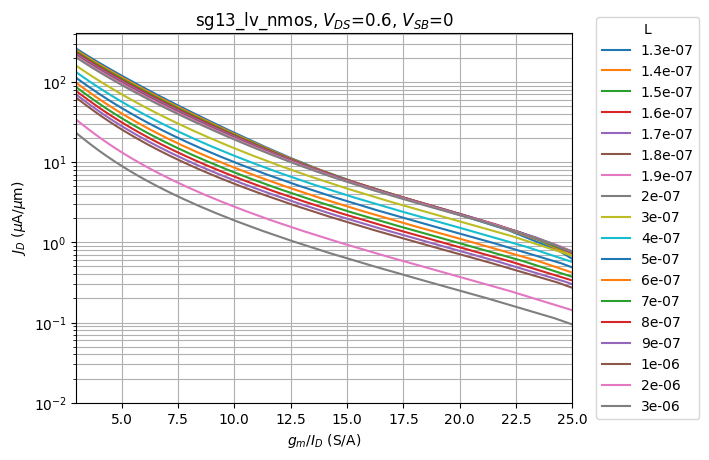

In [102]:
# plot jd versus gm/ID for all L
jd2 = df2['ids'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(1e-2, np.amax(jd2))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

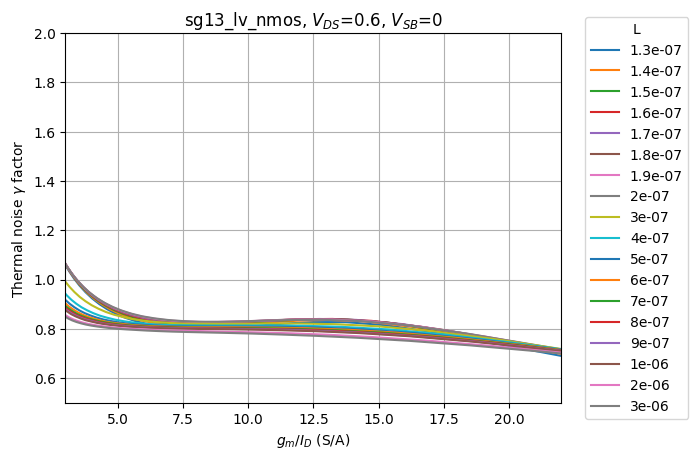

In [103]:
# plot gamma versus gm/ID for all L
gamma = df2['sid'].values / df2['gm'].values/4/300/1.38e-23
gamma = np.reshape(gamma, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gamma)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 22)
plt.ylim(0.5, 2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

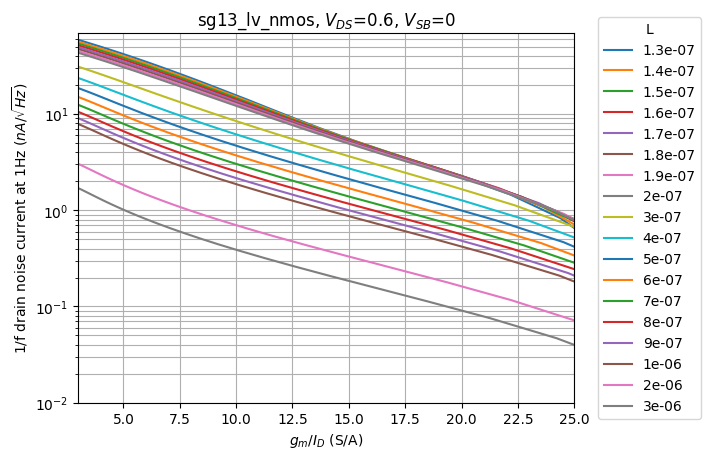

In [104]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
n1overf = df2['sfl'].values
n1overf = np.reshape(n1overf, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, np.sqrt(n1overf)/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(1e-2, np.amax(np.sqrt(n1overf)/1e-9))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

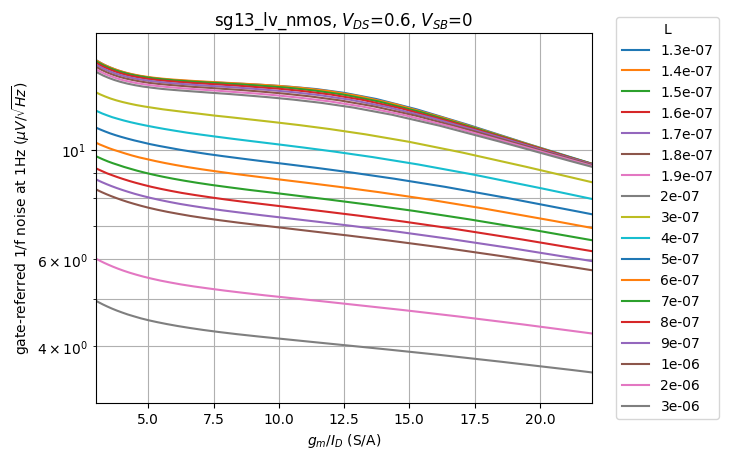

In [105]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
n1overf_gate = df2['sfl'].values / df2['gm'].values**2
n1overf_gate = np.reshape(n1overf_gate, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, np.sqrt(n1overf_gate)/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 22)
plt.ylim(np.amin(np.sqrt(n1overf_gate)/1e-6), np.amax(np.sqrt(n1overf_gate)/1e-6))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()